In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("infection_genotypes.csv")

In [3]:
df.head()

,human_id,t,SNP_0,SNP_1,SNP_2,SNP_3,SNP_4,SNP_5,SNP_6,SNP_7,...,SNP_14,SNP_15,SNP_16,SNP_17,SNP_18,SNP_19,SNP_20,SNP_21,SNP_22,SNP_23
0,7886,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,1,1
1,5064,0,0,0,1,0,1,1,1,0,...,1,1,0,1,1,0,1,1,1,0
2,2314,0,0,0,0,1,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0
3,3715,0,1,1,0,0,1,1,0,0,...,0,1,1,1,1,1,0,1,1,0
4,9050,0,0,1,0,1,1,1,0,1,...,1,1,1,0,1,0,1,0,1,0


In [4]:
all_genomes = df[[f"SNP_{i}" for i in range(24)]].values
df["genotype"] = all_genomes.tolist()

In [5]:
df_t = df[df["t"]==0]

In [17]:
import hashlib
import numpy as np

def hash_array(array):
    # Convert the array to bytes
    array_bytes = array.tobytes()

    # Create a hash of the bytes
    hash_object = hashlib.md5(array_bytes)

    # Convert the hash object to a hexadecimal string
    hash_hex = hash_object.hexdigest()

    return hash_hex

In [18]:
type(df_t["genotype"].iloc[0])

list

In [20]:
df["genotype_hash"] = df["genotype"].apply(lambda x: hash_array(np.array(x)))

In [21]:
df["genotype_hash"]

0          0abe4d0a49f41ac83fa1953ec81e9b33
1          46b39876c54bf142bb0a0415d23a4bc6
2          0519f838e8c59a77417dba9ff04a6c07
3          f31657e3c3e57dd14f8ea27483b93faa
4          a091c1636490768eeb4a0abcf5db1d8d
                         ...               
1713694    0d5702f721ec080b2fbb101b8c55cae4
1713695    452582aaddea9a49f5d6f5881674213b
1713696    9ee681d6db0723fcdacb7069e375de27
1713697    0e6e3a3f179dfdfd29359215e059a977
1713698    863aab4e1508b0be917853044979f409
Name: genotype_hash, Length: 1713699, dtype: object

In [27]:
foo = df.groupby('genotype_hash')['t'].agg(lambda x: x.max() - x.min()).reset_index()

(array([1.3320e+03, 6.2200e+02, 1.1350e+03, 5.2600e+02, 1.0020e+03,
        3.7940e+03, 2.9321e+04, 4.3500e+02, 8.8100e+02, 4.3400e+02,
        8.5100e+02, 4.3100e+02, 8.9700e+02, 3.3700e+02, 3.0800e+02,
        1.4100e+02, 2.5400e+02, 1.0300e+02, 2.1100e+02, 8.7000e+01,
        1.3600e+02, 6.1000e+01, 1.0800e+02, 6.0000e+01, 9.8000e+01,
        3.8000e+01, 7.5000e+01, 3.7000e+01, 5.7000e+01, 3.0000e+01,
        6.0000e+01, 3.1000e+01, 4.3000e+01, 2.0000e+01, 5.6000e+01,
        2.4000e+01, 4.7000e+01, 2.8000e+01, 3.3000e+01, 2.0000e+01,
        2.9000e+01, 1.6000e+01, 2.8000e+01, 1.1000e+01, 2.0000e+01,
        1.5000e+01, 2.3000e+01, 1.2000e+01, 1.9000e+01, 1.5000e+01,
        9.0000e+00, 1.7000e+01, 1.1000e+01, 2.3000e+01, 5.0000e+00,
        2.1000e+01, 3.0000e+00, 1.7000e+01, 8.0000e+00, 1.5000e+01,
        1.1000e+01, 1.5000e+01, 5.0000e+00, 7.0000e+00, 5.0000e+00,
        5.0000e+00, 4.0000e+00, 1.1000e+01, 9.0000e+00, 6.0000e+00,
        3.0000e+00, 9.0000e+00, 5.0000e+00, 9.00

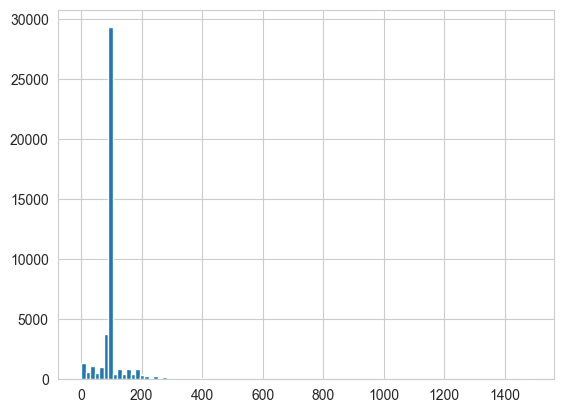

In [30]:
plt.hist(foo["t"], bins=100)

In [31]:
np.max(foo["t"])

1490

In [32]:
foo["t"].describe()

count    44803.000000
mean       113.660692
std        128.684258
min          0.000000
25%         90.000000
50%         90.000000
75%         90.000000
max       1490.000000
Name: t, dtype: float64

In [ ]:
# Create a unique hash for each genotype
df["genotype_hash"] = df["genotype"].apply(lambda x: hash(tuple(x)))

In [ ]:
df["genotype"].apply(lambda x: np.hash(tuple(x)))